In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
from datetime import datetime
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.metrics import roc_auc_score, mean_absolute_error, mean_squared_error
from tensorflow.keras.utils import to_categorical
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns

In [2]:
df_scaled = pd.read_csv('df_scaled.csv')

108/108 [==============================] - 0s 492us/step
Accuracy: 0.87
Precision: 0.86
Recall: 0.89
F1 Score: 0.88
Confusion Matrix:
[[1462  249]
 [ 184 1554]]


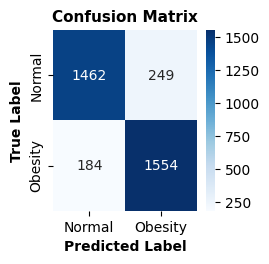

In [4]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score
import networkx as nx
import matplotlib.colors as mcolors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# 데이터 로드 및 전처리
data = df_scaled
X = data[['Age', 'DBP', 'SBP', 'relativegrip', 'sitreach', 'situps', '20m_vo2max', '10m_run', 'jump', 'gender_numeric']]
y = data['BMI_gr_num']

# 언더샘플링 적용
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Data scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 로드
model_save_dir = r'c:\Users\Jun-Hyun Bae\Desktop\raw_data\국민100\models'
best_fold = 7
best_model_timestamp = "2024-01-21_22-31-24"
best_model_path = os.path.join(model_save_dir, f"undersampling_kfold_{best_fold}_{best_model_timestamp}.keras")
best_model = tf.keras.models.load_model(best_model_path)

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)


accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)


# Display the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

# Display confusion matrix as a heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Obesity'], yticklabels=['Normal', 'Obesity'])
plt.xlabel('Predicted Label', fontweight='bold')
plt.ylabel('True Label', fontweight='bold')
plt.title('Confusion Matrix', fontdict={'fontsize': 11, 'fontweight': 'bold'})

plt.tight_layout(pad=2)
plt.show()

108/108 [==============================] - 0s 418us/step


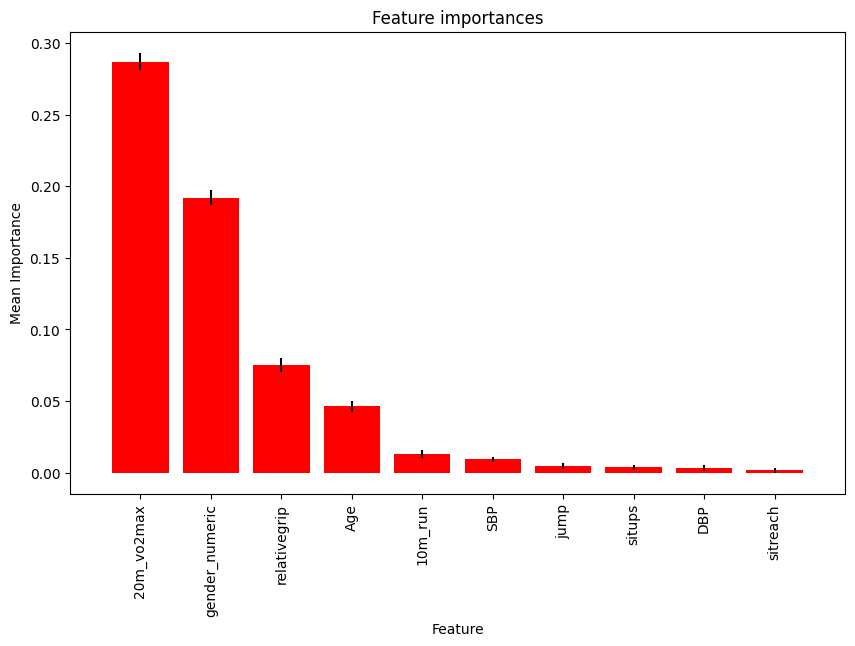

In [49]:
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.inspection import permutation_importance

# Modify the scoring function to accept the model as a parameter and ignore it
def keras_model_score(_, X, y):
    y_pred = best_model.predict(X)
    y_pred_binary = (y_pred > 0.5).astype(int)
    return accuracy_score(y, y_pred_binary)

# Use the modified scoring function with permutation_importance
result = permutation_importance(best_model, X_test, y_test, n_repeats=30, 
                                random_state=0, scoring=lambda estimator, X, y: keras_model_score(estimator, X, y))

importances = result.importances_mean
std_devs = result.importances_std

# Assuming `importances` and `std_devs` are obtained from the permutation_importance
features = X_test.columns
indices = np.argsort(importances)[::-1]

# Plotting
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices], color="r", yerr=std_devs[indices], align="center")
plt.xticks(range(X_test.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X_test.shape[1]])
plt.ylabel("Mean Importance")
plt.xlabel("Feature")
plt.show()


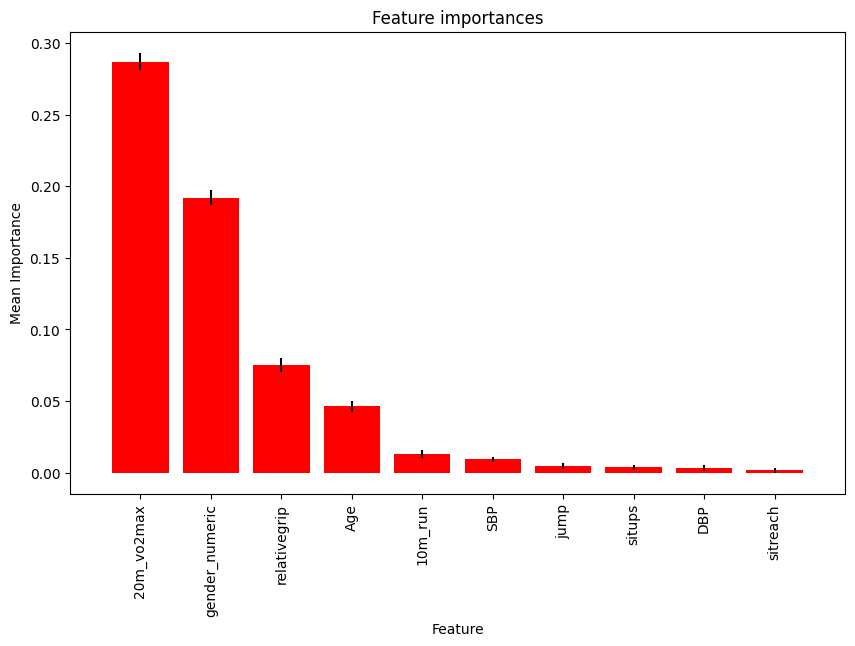

In [33]:
# Assuming `importances` and `std_devs` are obtained from the permutation_importance
features = X_test.columns
indices = np.argsort(importances)[::-1]

# Plotting
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices], color="r", yerr=std_devs[indices], align="center")
plt.xticks(range(X_test.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X_test.shape[1]])
plt.ylabel("Mean Importance")
plt.xlabel("Feature")
plt.show()

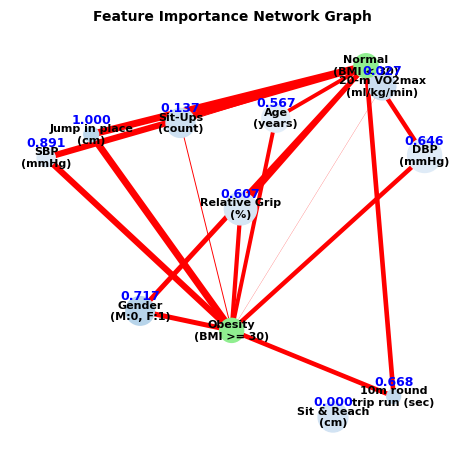

In [50]:
features = X_test.columns
feature_importances = np.random.rand(len(X_test.columns))  # Dummy importance data
indices = np.argsort(importances)[::-1]  # Sort the importances in descending order
sorted_features = features[indices]

# Scaling node size and color based on importance
scaled_importances = (feature_importances[indices] - min(feature_importances)) / (max(feature_importances) - min(feature_importances))
colors = np.array([plt.cm.Blues(i) for i in np.linspace(0.1, 0.3, len(scaled_importances))])
node_sizes_dict = {feature: 100 + (s * 500) for feature, s in zip(sorted_features, scaled_importances)}


# Create a graph
G = nx.Graph()

# Set specific sizes for 'Normal' and 'Obesity' nodes
node_sizes_dict['Normal'] = 300  # Adjust this size as needed
node_sizes_dict['Obesity'] = 300  # Adjust this size as needed

# Add nodes to the graph
for feature, color in zip(X_test.columns, colors):
    G.add_node(feature, color=color)
G.add_node('Normal', color='lightgreen')
G.add_node('Obesity', color='lightgreen')

# Add edges
for i, feature in enumerate(X_test.columns):
    G.add_edge(feature, 'Normal', weight=scaled_importances[i])
    G.add_edge(feature, 'Obesity', weight=scaled_importances[i])

# Label mapping
label_mapping = {
    'Age': 'Age\n(years)',
    'DBP': 'DBP\n(mmHg)',
    'SBP': 'SBP\n(mmHg)',
    'relativegrip': 'Relative Grip\n(%)',
    'sitreach': 'Sit & Reach\n(cm)',
    'situps': 'Sit-Ups\n(count)',
    '20m_vo2max': '20-m VO2max\n(ml/kg/min)',
    '10m_run': '10m round\ntrip run (sec)',
    'jump': 'Jump in place\n(cm)',
    'gender_numeric': 'Gender\n(M:0, F:1)',
    'Normal': 'Normal\n(BMI < 30)',
    'Obesity': 'Obesity\n(BMI >= 30)'
}
# Draw network graph
plt.figure(figsize=(10, 10))
# Draw the graph

pos = nx.spring_layout(G, k=0.15, iterations=2, seed=20)
node_sizes = [node_sizes_dict[node] for node in G.nodes()]  # Extract sizes for all nodes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=[G.nodes[node]['color'] for node in G.nodes()])
nx.draw_networkx_labels(G, pos, labels=label_mapping, font_size=8, font_weight='bold', font_color='black')

# Draw edges with thinner lines
edge_width = 5
for edge in G.edges(data=True):
    nx.draw_networkx_edges(G, pos, edgelist=[edge], width=edge[2]['weight'] * edge_width, edge_color='red')

# Display feature importance values
for i, feature in enumerate(X_test.columns):
    x, y = pos[feature]
    plt.text(x, y + 0.04, f"{scaled_importances[i]:.3f}", fontsize=9, ha='center', va='bottom', color='blue', fontweight='bold')


plt.title('Feature Importance Network Graph', fontsize=10, fontweight='bold')
plt.axis('off')
plt.tight_layout(pad=20)  # Adjusts the plot to ensure everything fits without overlapping
plt.show()

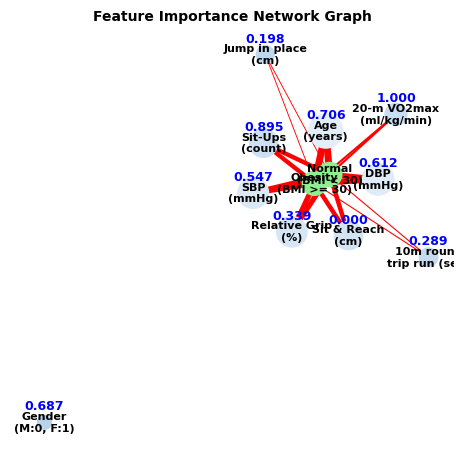

In [40]:

X_test.columns
# Example feature importances (replace with actual importances from your model)
feature_importances = np.random.rand(len(X.columns))  # Dummy importances

# Scaling node size and color based on importance
colors = np.array([plt.cm.Blues(i) for i in np.linspace(0.1, 0.3, len(scaled_importances))])
node_sizes_dict = {feature: 100 + (s * 500) for feature, s in zip(X.columns, scaled_importances)}

# Set specific sizes for 'Normal' and 'Obesity' nodes
node_sizes_dict['Normal'] = 300
node_sizes_dict['Obesity'] = 300

# Create a graph
G = nx.Graph()

# Add nodes to the graph
for feature, color in zip(X.columns, colors):
    G.add_node(feature, color=color)
G.add_node('Normal', color='lightgreen')
G.add_node('Obesity', color='lightgreen')

# Add edges
for i, feature in enumerate(X.columns):
    G.add_edge(feature, 'Normal', weight=scaled_importances[i])
    G.add_edge(feature, 'Obesity', weight=scaled_importances[i])

scaled_importances = (feature_importances - min(feature_importances)) / (max(feature_importances) - min(feature_importances))

# Label mapping
label_mapping = {
    'Age': 'Age\n(years)',
    'DBP': 'DBP\n(mmHg)',
    'SBP': 'SBP\n(mmHg)',
    'relativegrip': 'Relative Grip\n(%)',
    'sitreach': 'Sit & Reach\n(cm)',
    'situps': 'Sit-Ups\n(count)',
    '20m_vo2max': '20-m VO2max\n(ml/kg/min)',
    '10m_run': '10m round\ntrip run (sec)',
    'jump': 'Jump in place\n(cm)',
    'gender_numeric': 'Gender\n(M:0, F:1)',
    'Normal': 'Normal\n(BMI < 30)',
    'Obesity': 'Obesity\n(BMI >= 30)'
}

# Draw network graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.15, iterations=15, seed=20)
node_sizes = [node_sizes_dict[node] for node in G.nodes()]  # Extract sizes for all nodes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=[G.nodes[node]['color'] for node in G.nodes()])
nx.draw_networkx_labels(G, pos, labels=label_mapping, font_size=8, font_weight='bold', font_color='black')

# Draw edges with thinner lines
edge_width = 5
for edge in G.edges(data=True):
    nx.draw_networkx_edges(G, pos, edgelist=[edge], width=edge[2]['weight'] * edge_width, edge_color='red')

# Display feature importance values
for i, feature in enumerate(X.columns):
    x, y = pos[feature]
    plt.text(x, y + 0.04, f"{scaled_importances[i]:.3f}", fontsize=9, ha='center', va='bottom', color='blue', fontweight='bold')

plt.title('Feature Importance Network Graph', fontsize=10, fontweight='bold')
plt.axis('off')
plt.tight_layout(pad=20)  # Adjusts the plot to ensure everything fits without overlapping
plt.show()

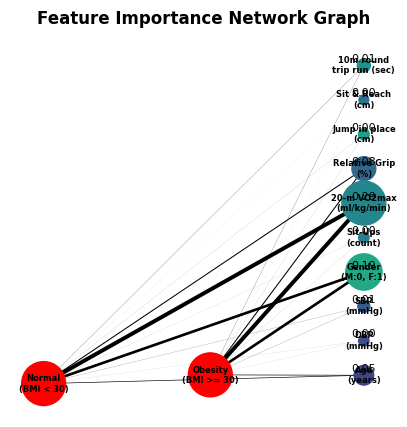

In [59]:
features = X_test.columns
indices = np.argsort(importances)[::-1]

feature_importances = np.random.rand(len(X_test.columns))  # Dummy importance data
indices = np.argsort(importances)[::-1]  # Sort the importances in descending order
sorted_features = features[indices]

# Define color gradation of nodes and edges according to feature importance
node_colors = plt.cm.viridis(np.linspace(0.2, 0.6, len(X.columns)))
edge_colors = plt.cm.plasma(np.linspace(0.2, 0.6, len(X.columns)))

# Create a graph
G = nx.Graph()

# Add each feature and 'Normal', 'Obesity' nodes and set color
for feature, color in zip(X.columns, node_colors):
    G.add_node(feature, color=color)
G.add_node('Normal', color='red')
G.add_node('Obesity', color='red')

# Add edges and set color according to importance
for i, feature in enumerate(X.columns):
    edge_color = edge_colors[i]
    G.add_edge(feature, 'Normal', weight=importances[i], color=edge_color)
    G.add_edge(feature, 'Obesity', weight=importances[i], color=edge_color)

# Node size scaling
scaled_importances = (importances - min(importances)) / (max(importances) - min(importances))
node_sizes = [50 + (s * 950) for s in scaled_importances] + [1000, 1000]

# Label mapping
label_mapping = {
    'Age': 'Age\n(years)',
    'DBP': 'DBP\n(mmHg)',
    'SBP': 'SBP\n(mmHg)',
    'relativegrip': 'Relative Grip\n(%)',
    'sitreach': 'Sit & Reach\n(cm)',
    'situps': 'Sit-Ups\n(count)',
    '20m_vo2max': '20-m VO2max\n(ml/kg/min)',
    '10m_run': '10m round\ntrip run (sec)',
    'jump': 'Jump in place\n(cm)',
    'gender_numeric': 'Gender\n(M:0, F:1)',
    'Normal': 'Normal\n(BMI < 30)',
    'Obesity': 'Obesity\n(BMI >= 30)'
}

# Draw network graph
plt.figure(figsize=(5, 5))

# Custom layout: place 'Normal' and 'Obesity' separately and features in a line
pos = nx.spring_layout(G, k=0.15, iterations=5, seed=37)  # Node position layout for visualization
feature_positions = {feature: (0, i) for i, feature in enumerate(sorted_features)}
#pos = {'Normal': (-1, len(sorted_features) / 2), 'Obesity': (1, len(sorted_features) / 2)}
pos.update(feature_positions)

#pos.update({feature: (0, i) for i, feature in enumerate(sorted_features)})
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=[G.nodes[node]['color'] for node in G.nodes])
nx.draw_networkx_labels(G, pos, labels=label_mapping, font_size=6, font_weight='bold')


# Draw edges
for edge in G.edges(data=True):
    nx.draw_networkx_edges(G, pos, edgelist=[edge], width=edge[2]['weight']*10, edge_color='black')

# Display feature importance values
for i, feature in enumerate(X.columns):
    x, y = pos[feature]
    plt.text(x, y+0.05, f"{importances[i]:.2f}", fontsize=8, ha='center', va='bottom', color='black')

plt.title('Feature Importance Network Graph', fontweight='bold')
plt.axis('off')  # Remove graph axes and borders
plt.show()

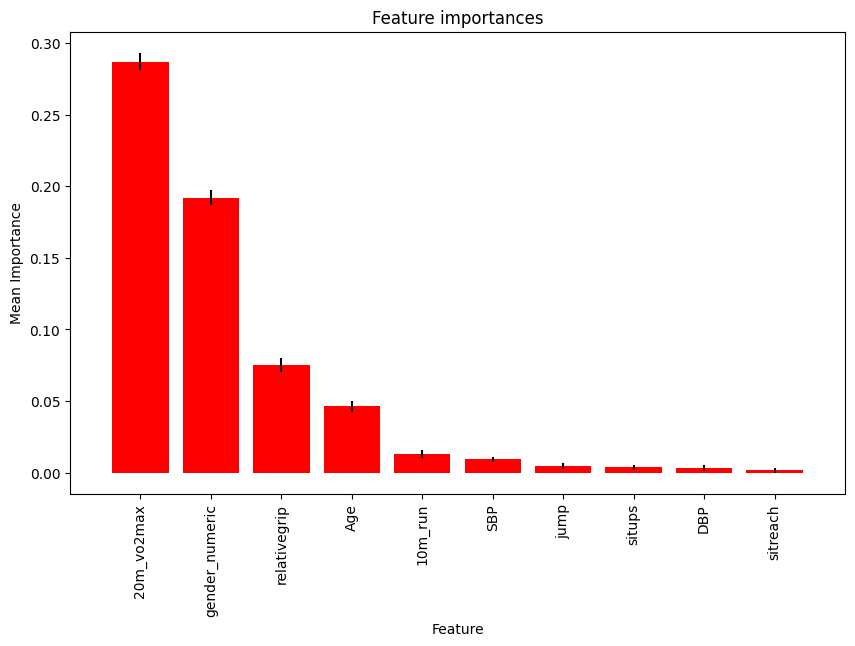

In [57]:
# Assuming `importances` and `std_devs` are obtained from the permutation_importance
features = X_test.columns
indices = np.argsort(importances)[::-1]

# Plotting
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices], color="r", yerr=std_devs[indices], align="center")
plt.xticks(range(X_test.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X_test.shape[1]])
plt.ylabel("Mean Importance")
plt.xlabel("Feature")
plt.show()